In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.model_selection.pair_search import PairSearch
from ram.analysis.statistics import get_stats, rollup_returns

In [3]:
run1 = RunManager('StatArbStrategy', 'run_0148', test_periods=0)
run2 = RunManager('StatArbStrategy', 'run_0149', test_periods=0)

In [4]:
run1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,data_rank_flag,False,144,0.631897,0.039310,-999.0
1,data_rank_flag,True,144,0.650762,0.042390,-999.0
2,drop_binaries,False,144,0.658155,0.041954,-999.0
3,drop_binaries,True,144,0.624503,0.039745,-999.0
4,holding_period,3,96,0.765403,0.047058,-999.0
5,holding_period,5,96,0.615210,0.039464,-999.0
6,holding_period,7,96,0.543375,0.036028,-999.0
7,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",288,0.641329,0.040850,-999.0
8,per_side_count,10,144,0.682414,0.038468,-999.0
9,per_side_count,20,144,0.600245,0.043232,-999.0


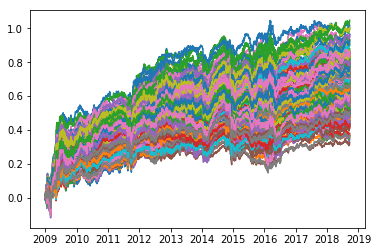

In [5]:
plt.figure()
plt.plot(run1.returns.cumsum())
plt.show()

In [6]:
run2.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,data_rank_flag,True,648,0.193551,0.014196,-999.0
1,drop_binaries,False,648,0.193551,0.014196,-999.0
2,first_sort_response,Response_Simple_10,108,0.191513,0.015896,-999.0
3,first_sort_response,Response_Simple_2,108,0.195466,0.013928,-999.0
4,first_sort_response,Response_Simple_3,108,0.193103,0.013823,-999.0
5,first_sort_response,Response_Simple_5,108,0.190203,0.013559,-999.0
6,first_sort_response,Response_Smoothed_10,108,0.194913,0.013999,-999.0
7,first_sort_response,Response_Smoothed_5,108,0.196108,0.013971,-999.0
8,holding_period,2,216,0.215939,0.015381,-999.0
9,holding_period,3,216,0.183398,0.013533,-999.0


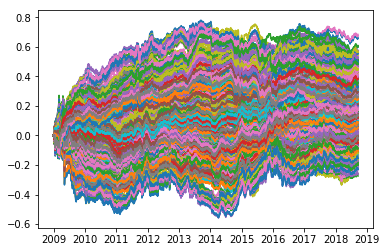

In [7]:
plt.figure()
plt.plot(run2.returns.cumsum())
plt.show()

# Combo Search

In [8]:
comb = CombinationSearch()
comb.set_selection_criteria('sharpe')
comb.params['training_epochs'] = 20

comb.add_run(run1)

In [9]:
comb.start()

Reading and aggregating runs...


  0%|          | 0/20 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 20/20 [05:22<00:00, 12.82s/it]


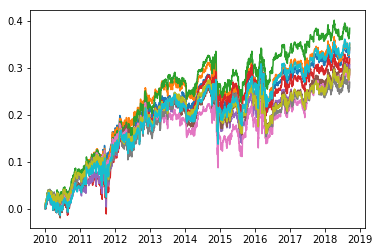

In [10]:
plt.figure()
plt.plot(comb.best_results_returns.cumsum())
plt.show()